In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../Restaurant-Dataset/Independence100.csv',index_col=0)
df

,Restaurant,Sales,Average Check,City,State,Meals Served
Rank,,,,,,
1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...
96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0
97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0
98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0


In [13]:
#BOOTSTRAP
#Tomamos una muestra Aleatoria
df['Sales'].sample(n=20, replace=False)

Rank
53     16981741.0
75     14130500.0
6      25409952.0
94     12228168.0
28     19530159.0
21     22181607.0
68     14972300.0
19     22500000.0
38     18248030.0
100    11391678.0
86     12809921.0
40     18159612.0
7      25233543.0
51     17212800.0
67     14978103.0
91     12498000.0
89     12566618.0
56     16154000.0
2      35218364.0
18     22749232.0
Name: Sales, dtype: float64

In [14]:
sales = df['Sales']


means = []

#100_000 usamos el _ para separar el numero y hacerlo mas facil de leer en este caso el numero es el 100mil

#obtengo una muestra le saco el promedio y lo guardo
#esto para asegurarnos que la muestra obtenido si es representativa
for i in range(100_000):
    sample = sales.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

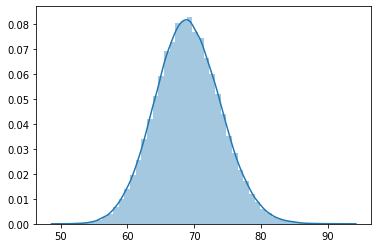

In [12]:
sns.distplot(serie_means);

In [9]:
#skewness es la asimetria y se obtiene con la funcion skew()
serie_means.skew()

0.18586915895260672

In [8]:
#la curtosis nos que tan dispersos estan los numeros entre mas cercano a 0 quiere decir que esta mas junta y entre mas ccercana a 1 quiere decir que esta mas dispersa
#Los datos estan muy juntos
serie_means.kurtosis()

0.04408809658136281

In [15]:
#BOOSTRAP "Averaage Check"
df['Average Check'].sample(n=20, replace=False)
average_check = df['Average Check']


means2 = []

#100_000 usamos el _ para separar el numero y hacerlo mas facil de leer en este caso el numero es el 100mil

#obtengo una muestra le saco el promedio y lo guardo
#esto para asegurarnos que la muestra obtenido si es representativa
for i in range(100_000):
    sample = average_check.sample(n=50, replace=True)
    means2.append(sample.mean())
    
serie_means2 = pd.Series(means2)

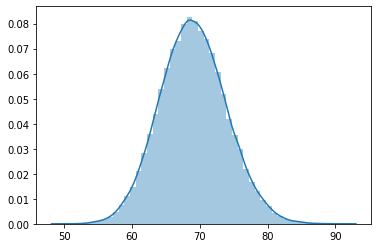

In [17]:
sns.distplot(serie_means2);

In [18]:
#BOOSTRAP "Meals Served"
df['Meals Served'].sample(n=20, replace=False)
mealsServed = df['Meals Served']


means3 = []

#100_000 usamos el _ para separar el numero y hacerlo mas facil de leer en este caso el numero es el 100mil

#obtengo una muestra le saco el promedio y lo guardo
#esto para asegurarnos que la muestra obtenido si es representativa
for i in range(100_000):
    sample = mealsServed.sample(n=50, replace=True)
    means3.append(sample.mean())
    
serie_means3 = pd.Series(means3)

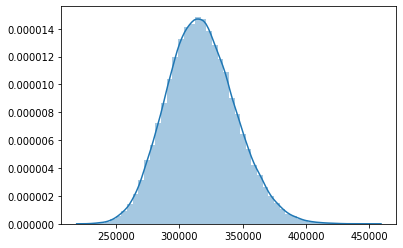

In [19]:
sns.distplot(serie_means3);

In [28]:
#ERROR STANDARD

In [24]:
#ERROR STANDARD
print(f'Error estandar Sales: {serie_means.std()}')
print(f'Error estandar Average Check: {serie_means2.std()}')
print(f'Error estandar Meals Served: {serie_means3.std()}')

Error estandar Sales: 704769.6029557282
Error estandar Average Check: 4.890083115459744
Error estandar Meals Served: 27044.052401234192


In [26]:
#Columna "Sales" Values
print(f'Valor mínimo Sales: {serie_means.min()}')
print(f'Valor máximo Sales: {serie_means.max()}')
print(f'Rango Sales: {serie_means.max() - serie_means.min()}')

Valor mínimo Sales: 14967353.4
Valor máximo Sales: 21159410.2
Rango Sales: 6192056.799999999


In [29]:
#Columna "Average Check" Values
print(f'Valor mínimo Average Check: {serie_means2.min()}')
print(f'Valor máximo Average Check: {serie_means2.max()}')
print(f'Rango Average Check: {serie_means2.max() - serie_means2.min()}')

Valor mínimo Average Check: 49.7
Valor máximo Average Check: 91.46
Rango Average Check: 41.75999999999999


In [31]:
#Columna "Meals Served" Values
print(f'Valor mínimo Meals Served: {serie_means3.min()}')
print(f'Valor máximo Meals Served: {serie_means3.max()}')
print(f'Rango Meals Served: {serie_means3.max() - serie_means3.min()}')

Valor mínimo Meals Served: 227542.98
Valor máximo Meals Served: 450577.72
Rango Meals Served: 223034.73999999996


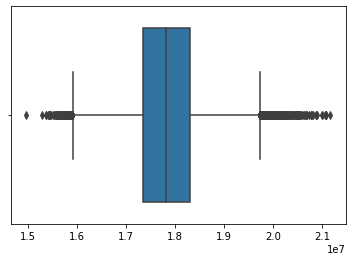

In [32]:
#Sales 
sns.boxplot(x=serie_means);

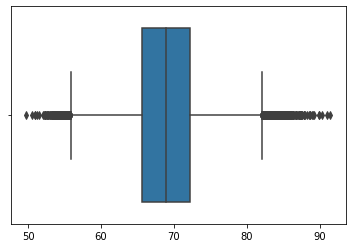

In [33]:
#Average Check
sns.boxplot(x=serie_means2);

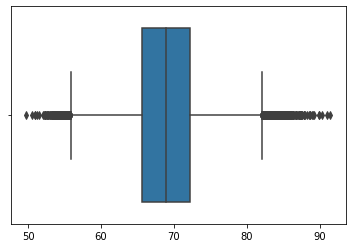

In [34]:
#Meals Served
sns.boxplot(x=serie_means2);

In [35]:
#INTERVALO DE CONFIANZA

In [37]:
#Sales---->utilizamos cuantiles para tener el intervalo del 95% de confianza
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {sales.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 16527622.7615 < 17833434.32 < 19280914.6745


In [38]:
#Average check---->utilizamos cuantiles para tener el intervalo del 95% de confianza
limite_inferior2 = serie_means2.quantile(0.025)
limite_superior2 = serie_means2.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {limite_inferior2} < {average_check.mean()} < {limite_superior2}')

Intervalo de 95% confianza de la media: 59.68 < 69.05 < 78.9


In [39]:
#Meal Served----->utilizamos cuantiles para tener el intervalo del 95% de confianza
limite_inferior3 = serie_means3.quantile(0.025)
limite_superior3 = serie_means3.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {limite_inferior3} < {mealsServed.mean()} < {limite_superior3}')

Intervalo de 95% confianza de la media: 267454.50299999997 < 317166.66 < 373080.181


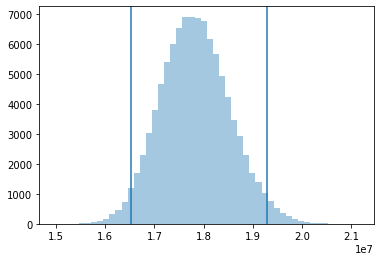

In [40]:
#Sales
sns.distplot(serie_means, kde=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

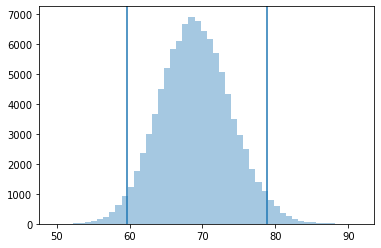

In [41]:
#Average check
sns.distplot(serie_means2, kde=False)
plt.axvline(limite_inferior2)
plt.axvline(limite_superior2);

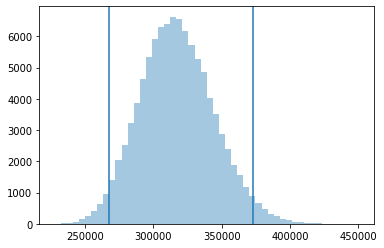

In [43]:
#Meals Served
sns.distplot(serie_means3, kde=False)
plt.axvline(limite_inferior3)
plt.axvline(limite_superior3);

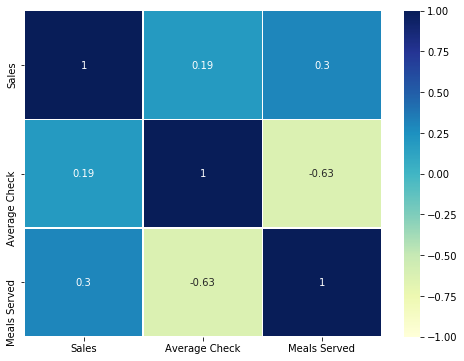

In [44]:
#ENTRENAMIENTO PRUEBA
#Obtenemos denuevo la matriz de correlacion
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [45]:
#Importamos libreria
from sklearn.model_selection import train_test_split

In [46]:
#utilizaremos Average check y Meals Served
X = df[['Average Check', 'Sales']]
y = df['Meals Served']

In [47]:
X

,Average Check,Sales
Rank,,
1,40,39080335.0
2,43,35218364.0
3,33,29104017.0
4,90,26916180.0
5,62,26900000.0
...,...,...
96,80,12194000.0
97,95,12187523.0
98,38,12032014.0


In [48]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
#El coeficiente de correlacion es mayor que la grafica
lr = LinearRegression()
lr.fit(X_training, y_training)
lr.score(X_test, y_test)

0.6829161887872521

In [53]:
#VALIDACIO CRUZADA

In [55]:
#imortamos librerias
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()

In [59]:
scores = cross_validate(lr2, X, y, scoring='r2')
scores
#fit_time': tiempo que se tardo en entrenar
#'score_time': cuanto se tardo en calcular el score
#'test_score: da el R2 para cada iteracion (R cuadrado o coeficiente de determinación o de correlación múltiple que debe ser entre -1 y 1 y queremos que sea lo mas cercano a 1)
#si la correlacion es menor a 0.5 antes de el entrenamiento es muy probable que la correlacion sea mayor como en este ejemplo

{'fit_time': array([0.00299168, 0.0029943 , 0.00350451, 0.00250626, 0.00299287]),
 'score_time': array([0.00199437, 0.00199342, 0.0009985 , 0.00199461, 0.00199366]),
 'test_score': array([ 0.28274193,  0.11464343,  0.4856829 ,  0.34628182, -0.16557828])}

In [58]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.213 +/- 0.224
